<a href="https://colab.research.google.com/github/asouzujoseph/Machine-learning-with-Python/blob/main/shill_bidding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**SCS 3253: Machine Learning** <br>
**Name**: Nnamdi Joseph Asouzu <br>
**Student** Number: X487118 <br>
**Final project**: Detection of shill bidding on eBay <br>

---




**Description of project**: some users on e-commerce websites such as ebay commit fraudulent activities such as shill bidding whereby these users collude with accomplices to hike the price of items by placing fake bids on the website. The goal of this project is to train a machine learning model that will accurately distinguish between a real bid and a shill bid.

---




**Description of features in the data** <br>
The dataset was downloaded from UCI machine learning archive. It contains information on shill bidding on ebay. The description of each feature is shown below:<br>
**Record ID**: Unique identifier of a record in the dataset.<br>
**Auction ID**: Unique identifier of an auction.<br>
**Bidder ID**: Unique identifier of a bidder.<br>
**Bidder Tendency**: A shill bidder participates exclusively in auctions of few sellers rather than a diversified lot. This is a collusive act involving the fraudulent seller and an accomplice.<br>
**Bidding Ratio**: A shill bidder participates more frequently to raise the auction price and attract higher bids from legitimate participants.<br>
**Successive Outbidding**: A shill bidder successively outbids himself even though he is the current winner to increase the price gradually with small consecutive increments.<br>
**Last Bidding**: A shill bidder becomes inactive at the last stage of the auction (more than 90\% of the auction duration) to avoid winning the auction.<br>
**Auction Bids**: Auctions with SB activities tend to have a much higher number of bids than the average of bids in concurrent auctions.<br>
**Auction Starting Price**: a shill bidder usually offers a small starting price to attract legitimate bidders into the auction.<br>
**Early Bidding**: A shill bidder tends to bid pretty early in the auction (less than 25\% of the auction duration) to get the attention of auction users.<br>
**Winning Ratio**: A shill bidder competes in many auctions but hardly wins any auctions.<br>
**Auction Duration**: How long an auction lasted.<br>
**Class**: 0 for normal behaviour bidding; 1 for otherwise. <br>

In [ ]:
# === NOTEBOOK & IMPORT SETUP ===
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
from ast import literal_eval
import tensorflow as tf
from tensorflow import keras
import random

pd.set_option("display.max_columns", None)
%matplotlib inline

In [ ]:
df_shill = pd.read_csv("/content/drive/MyDrive/Shill Bidding Dataset.csv")
df_shill = df_shill.drop(["Record_ID","Bidder_ID"],axis=1)
df_shill.head()

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
0,732,0.200000,0.400000,0.0,0.000028,0.0,0.993593,0.000028,0.666667,5,0
1,732,0.024390,0.200000,0.0,0.013123,0.0,0.993593,0.013123,0.944444,5,0
2,732,0.142857,0.200000,0.0,0.003042,0.0,0.993593,0.003042,1.000000,5,0
3,732,0.100000,0.200000,0.0,0.097477,0.0,0.993593,0.097477,1.000000,5,0
4,900,0.051282,0.222222,0.0,0.001318,0.0,0.000000,0.001242,0.500000,7,0


**Exploratory data** **analysis**

In [ ]:
df = df_shill.copy()

In [ ]:
df.describe()

,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
count,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000,6321.000000
mean,1241.388230,0.142541,0.127670,0.103781,0.463119,0.231606,0.472821,0.430683,0.367731,4.615093,0.106787
std,735.770789,0.197084,0.131530,0.279698,0.380097,0.255252,0.489912,0.380785,0.436573,2.466629,0.308867
min,5.000000,0.000000,0.011765,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
25%,589.000000,0.027027,0.043478,0.000000,0.047928,0.000000,0.000000,0.026620,0.000000,3.000000,0.000000
50%,1246.000000,0.062500,0.083333,0.000000,0.440937,0.142857,0.000000,0.360104,0.000000,5.000000,0.000000
75%,1867.000000,0.166667,0.166667,0.000000,0.860363,0.454545,0.993593,0.826761,0.851852,7.000000,0.000000
max,2538.000000,1.000000,1.000000,1.000000,0.999900,0.788235,0.999935,0.999900,1.000000,10.000000,1.000000


In [ ]:
corr_matrix = df.corr()
corr_matrix.style.background_gradient(cmap='coolwarm').set_precision(3)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  


,Auction_ID,Bidder_Tendency,Bidding_Ratio,Successive_Outbidding,Last_Bidding,Auction_Bids,Starting_Price_Average,Early_Bidding,Winning_Ratio,Auction_Duration,Class
Auction_ID,1.000,-0.007,-0.021,-0.003,0.070,0.098,0.016,0.068,-0.040,0.025,-0.008
Bidder_Tendency,-0.007,1.000,0.293,0.314,0.045,0.087,0.073,0.020,0.212,0.000,0.296
Bidding_Ratio,-0.021,0.293,1.000,0.605,-0.067,-0.348,-0.252,-0.148,0.643,-0.019,0.569
Successive_Outbidding,-0.003,0.314,0.605,1.000,0.099,0.065,0.052,0.057,0.382,0.010,0.901
Last_Bidding,0.070,0.045,-0.067,0.099,1.000,0.298,0.293,0.950,-0.077,0.011,0.098
Auction_Bids,0.098,0.087,-0.348,0.065,0.298,1.000,0.629,0.299,-0.381,0.093,0.045
Starting_Price_Average,0.016,0.073,-0.252,0.052,0.293,0.629,1.000,0.303,-0.263,0.023,0.043
Early_Bidding,0.068,0.020,-0.148,0.057,0.950,0.299,0.303,1.000,-0.137,0.011,0.054
Winning_Ratio,-0.040,0.212,0.643,0.382,-0.077,-0.381,-0.263,-0.137,1.000,-0.024,0.394
Auction_Duration,0.025,0.000,-0.019,0.010,0.011,0.093,0.023,0.011,-0.024,1.000,0.021


In [ ]:
corr_matrix["Class"].sort_values(ascending=False)

Class                     1.000000
Successive_Outbidding     0.901035
Bidding_Ratio             0.569435
Winning_Ratio             0.394122
Bidder_Tendency           0.295533
Last_Bidding              0.097655
Early_Bidding             0.053570
Auction_Bids              0.044964
Starting_Price_Average    0.042604
Auction_Duration          0.021145
Auction_ID               -0.007985
Name: Class, dtype: float64

Successive outbidding is the most correlated feature to the target variable.

In [ ]:
df= df.astype({"Successive_Outbidding":'category', "Auction_Duration":'category'})

/usr/local/lib/python3.7/dist-packages/seaborn/axisgrid.py:2076: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


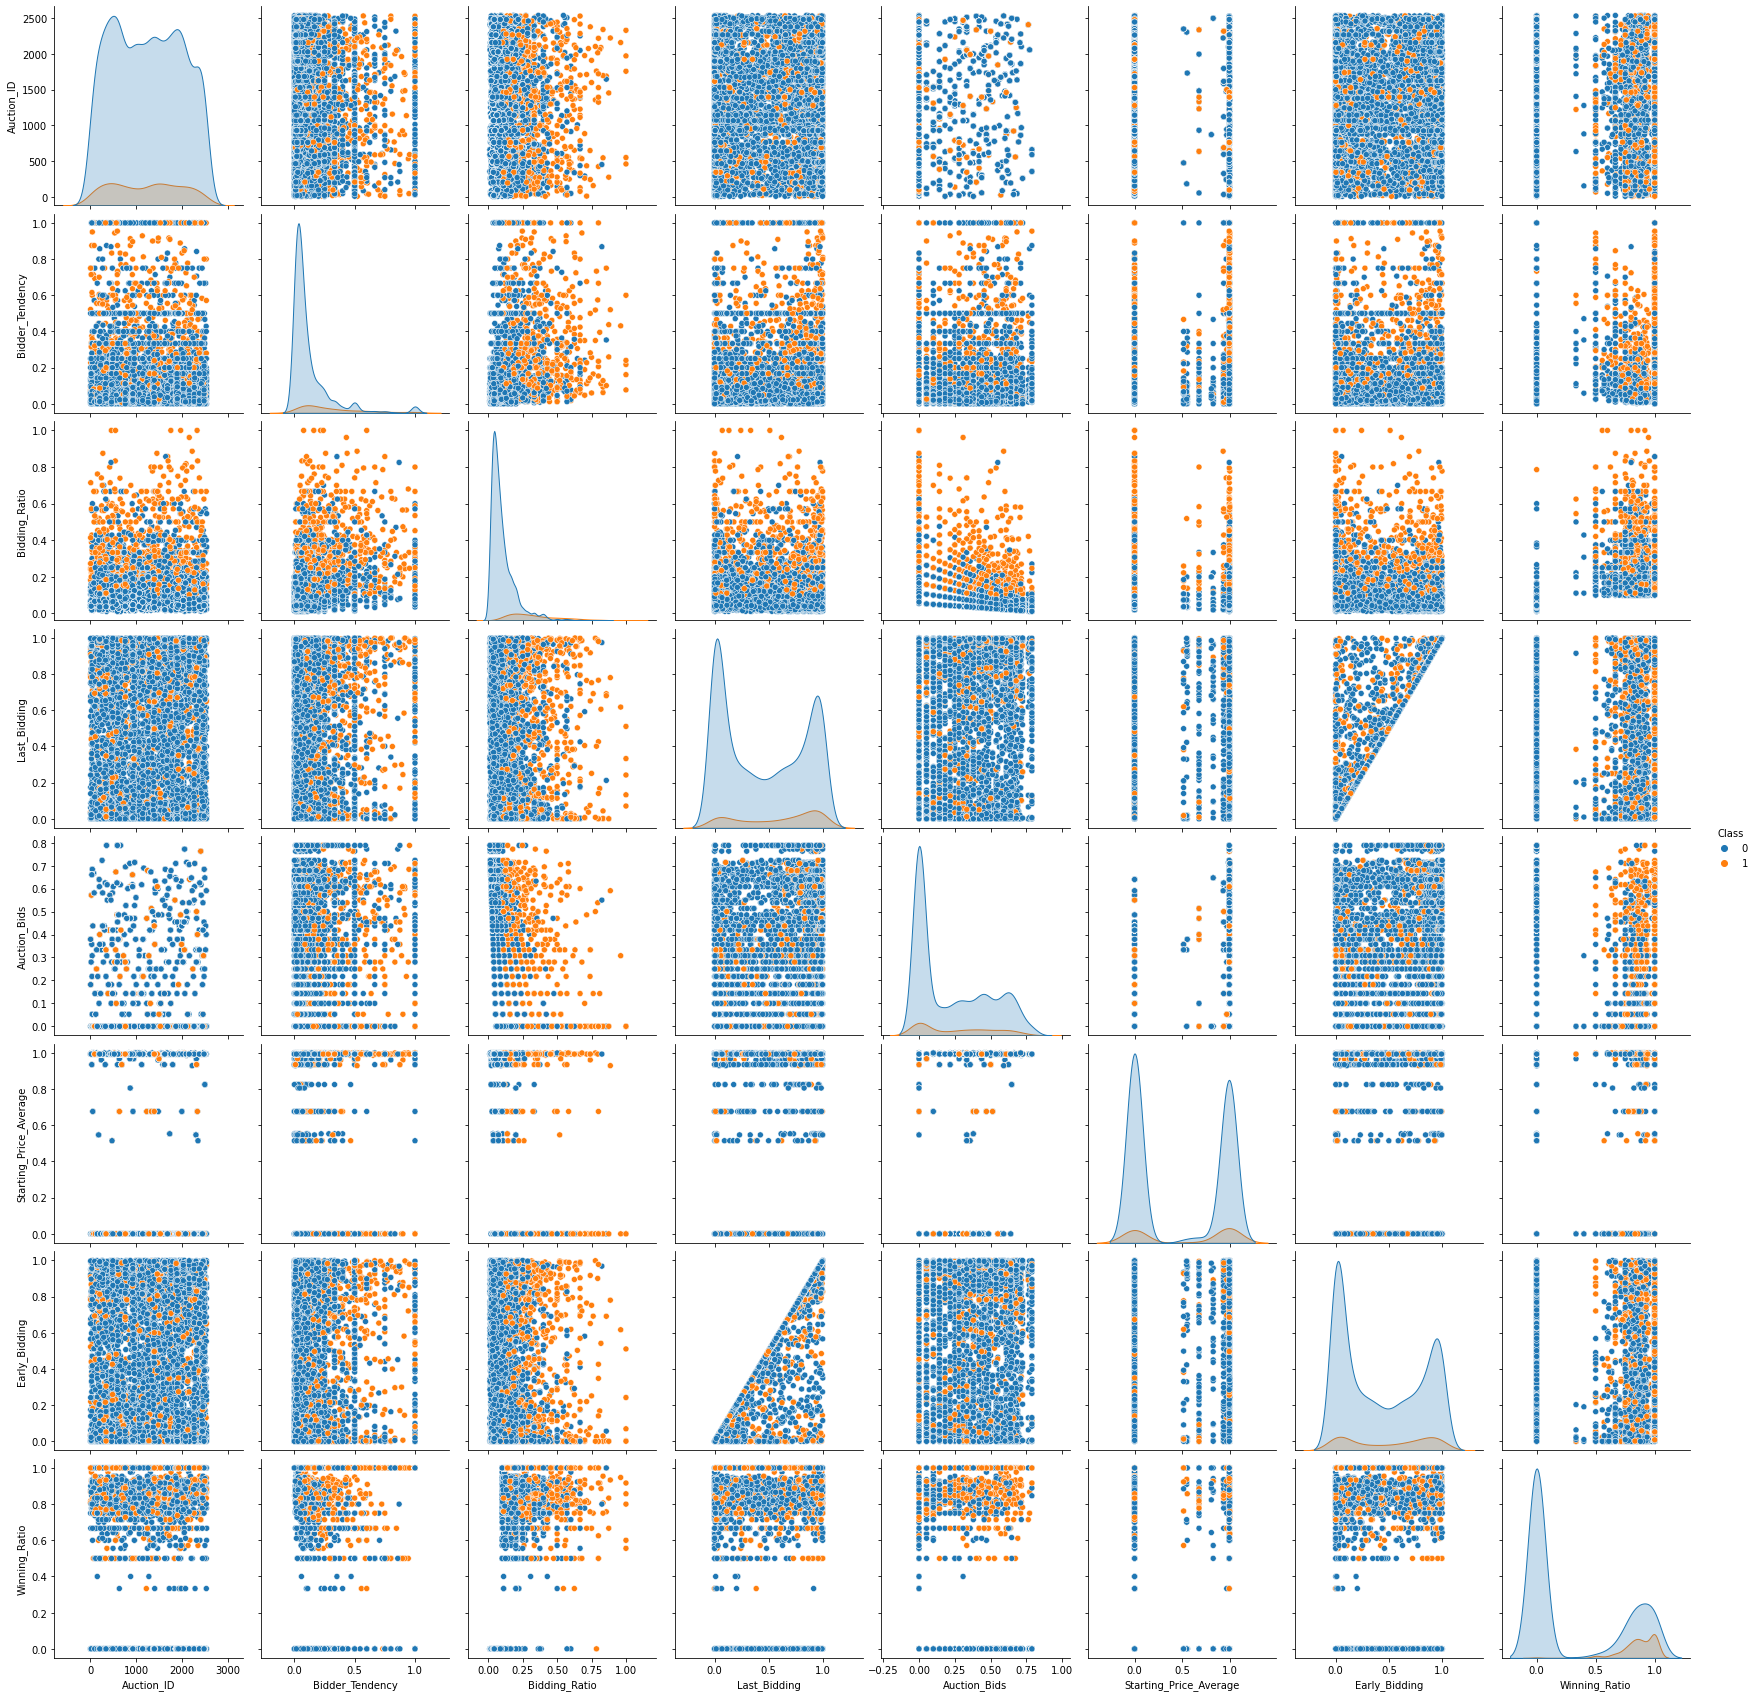

In [ ]:
sns.pairplot(df, hue="Class", size=3)

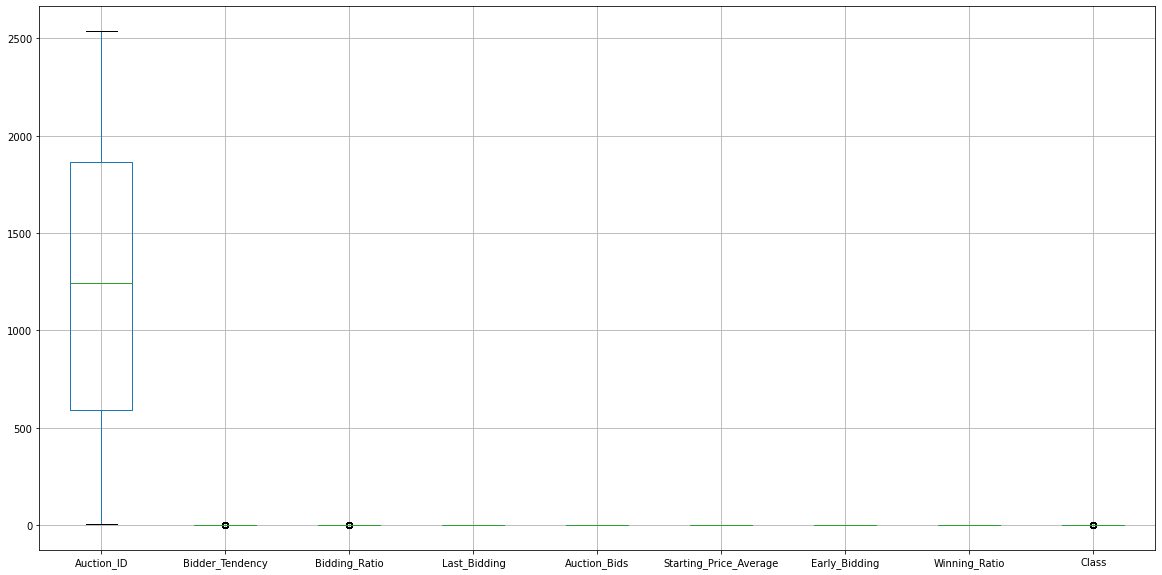

In [ ]:
plt.figure(figsize=(20,10))
df.boxplot();

there are no outliers

In [ ]:
df.info() # there are no missing values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6321 entries, 0 to 6320
Data columns (total 11 columns):
 #   Column                  Non-Null Count  Dtype   
---  ------                  --------------  -----   
 0   Auction_ID              6321 non-null   int64   
 1   Bidder_Tendency         6321 non-null   float64 
 2   Bidding_Ratio           6321 non-null   float64 
 3   Successive_Outbidding   6321 non-null   category
 4   Last_Bidding            6321 non-null   float64 
 5   Auction_Bids            6321 non-null   float64 
 6   Starting_Price_Average  6321 non-null   float64 
 7   Early_Bidding           6321 non-null   float64 
 8   Winning_Ratio           6321 non-null   float64 
 9   Auction_Duration        6321 non-null   category
 10  Class                   6321 non-null   int64   
dtypes: category(2), float64(7), int64(2)
memory usage: 457.3 KB


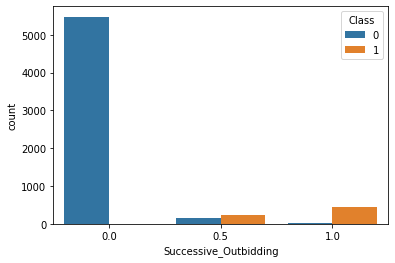

In [ ]:
sns.countplot(x="Successive_Outbidding", hue="Class", data=df);

All non-shill bids are not successively outbidded. This property will be exploited in designing a heuristic baseline model

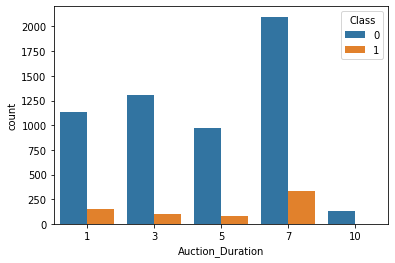

In [ ]:
sns.countplot(x="Auction_Duration", hue="Class", data=df);

All bids that lasted for at least 10 hours are not shill bids. This property will als be used in designing a heuristic baseline model

**Train / Test split**

In [ ]:
from sklearn.model_selection import train_test_split
# stratified spliiting of samples
df_train, df_test = train_test_split(
    df, 
    test_size=0.20, 
    random_state=0, 
    shuffle=True, 
    stratify=df["Class"]
)

In [ ]:
## test set
X_test = df_test.loc[:, df_test.columns != 'Class']
y_test = df_test["Class"]

In [ ]:
## create training and validation set
df_training, df_valid = train_test_split(
    df_train, 
    test_size=0.20, 
    random_state=0, 
    shuffle=True, 
    stratify=df_train["Class"]
)

In [ ]:
## training set
X_train = df_training.loc[:, df_training.columns != 'Class']
y_train = df_training["Class"]

In [ ]:
## validation set
X_val = df_valid.loc[:, df_valid.columns != 'Class']
y_val = df_valid["Class"]

**Baseline / Heuristic model**

In [ ]:
import random
random.seed(445)
def heuristic_model(Successive_Outbidding, Auction_Duration):
  """Custom non-ML 'heuristic' model. 
  Returns 1 if shilling is predicted, otherwise return 0. 
  """
  if Successive_Outbidding == 0:
    return 0
  if Auction_Duration == 10:
    return 0
  else:
    return 1

# apply it to our test set
df = df_test.copy()
df["pred_heuristic"] = df.apply(lambda row: heuristic_model(row["Successive_Outbidding"],row["Auction_Duration"]), axis=1)

# compute its accuracy
from sklearn.metrics import accuracy_score
heuristic_accuracy = accuracy_score(
    y_true=df["Class"], 
    y_pred=df["pred_heuristic"]
)
print(f"The accuracy of our heuristic model is {heuristic_accuracy:.3f}")


# === RANDOM GUESSING MODEL ===
# repeat this process for a 'random guessing' model

def random_guess():
  """Takes a 50:50 guess at what the binary class is. 
  """
  random_num = random.uniform(0, 1) 
  return 1 if random_num >= 0.5 else 0

df["pred_fiftyfifty"] = df_test.apply(lambda row: random_guess(), axis=1)

guess_accuracy = accuracy_score(
    y_true=df["Class"], 
    y_pred=df["pred_fiftyfifty"]
)
print(f"The accuracy of 50:50 guessing is {guess_accuracy:.3f}")

# # === ALL NON-SHILL MODEL ===
df["pred_all_nonShill"] = 0

all_nonShill_accuracy = accuracy_score(
    y_true=df["Class"], 
    y_pred=df["pred_all_nonShill"]
)
print(f"The accuracy of predicting all non-shill bids is {all_nonShill_accuracy:.3f}")

The accuracy of our heuristic model is 0.969
The accuracy of 50:50 guessing is 0.522
The accuracy of predicting all non-shill bids is 0.893


In [ ]:
## Calculate F1 scores
from sklearn.metrics import f1_score
random.seed(76)
heuristic_f1 = f1_score(
    y_true=df["Class"], 
    y_pred=df["pred_heuristic"]
)
print(f"The f1 score of our heuristic model is {heuristic_f1:.3f}")

guess_f1 = f1_score(
    y_true=df["Class"], 
    y_pred=df["pred_fiftyfifty"]
)
print(f"The f1 of 50:50 guessing is {guess_f1:.3f}")

all_nonShill_f1 = f1_score(
    y_true=df["Class"], 
    y_pred=df["pred_all_nonShill"]
)
print(f"The f1 of predicting all non-shill bids is {all_nonShill_f1:.3f}")

The f1 score of our heuristic model is 0.873
The f1 of 50:50 guessing is 0.179
The f1 of predicting all non-shill bids is 0.000


**Preprocessing of data for machine learning**

In [ ]:
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from typing import List

NUMERICAL_ATTRIBUTES = ['Auction_ID', 'Bidder_Tendency', 'Bidding_Ratio','Last_Bidding', 'Auction_Bids','Starting_Price_Average', 'Early_Bidding', 'Winning_Ratio']
CATEGORICAL_ATTRIBUTES = ["Successive_Outbidding", "Auction_Duration"]

numerical_pipeline = Pipeline([('imputer', SimpleImputer(strategy="median")),('std_scaler', StandardScaler()),])

# try:
from sklearn.compose import ColumnTransformer
# except ImportError:
#     from future_encoders import ColumnTransformer 

full_pipeline = ColumnTransformer([
        ("num", numerical_pipeline, NUMERICAL_ATTRIBUTES),
        ("cat", OneHotEncoder(), CATEGORICAL_ATTRIBUTES)])

X_train_preprocessed = full_pipeline.fit_transform(X_train)
X_test_preprocessed = full_pipeline.transform(X_test)
X_val_preprocessed = full_pipeline.transform(X_val)


**Model** **building**

Neural network

In [ ]:
model = keras.models.Sequential()
model.add(keras.layers.Flatten(input_shape=(X_train_preprocessed.shape[1],))) 
model.add(keras.layers.Dense(300, activation="relu"))
model.add(keras.layers.Dense(100, activation="relu"))
model.add(keras.layers.Dense(1, activation="sigmoid"))

In [ ]:
model.compile(
    loss=tf.keras.losses.BinaryCrossentropy(from_logits=False),
    optimizer=tf.keras.optimizers.Adam(),
    metrics=["accuracy", "Recall","Precision"]) 

In [ ]:
## Performance of model on the training dataset
random.seed(8989)
training_model = model.fit(X_train_preprocessed, y_train, epochs=10, validation_data=(X_val_preprocessed, y_val))

Epoch 1/10
127/127 [==============================] - 2s 6ms/step - loss: 0.1211 - accuracy: 0.9483 - recall: 0.7315 - precision: 0.7726 - val_loss: 0.0263 - val_accuracy: 0.9960 - val_recall: 0.9630 - val_precision: 1.0000
Epoch 2/10
127/127 [==============================] - 0s 3ms/step - loss: 0.0227 - accuracy: 0.9951 - recall: 0.9884 - precision: 0.9661 - val_loss: 0.0100 - val_accuracy: 0.9980 - val_recall: 0.9907 - val_precision: 0.9907
Epoch 3/10
127/127 [==============================] - 0s 3ms/step - loss: 0.0136 - accuracy: 0.9975 - recall: 0.9907 - precision: 0.9862 - val_loss: 0.0118 - val_accuracy: 0.9941 - val_recall: 0.9907 - val_precision: 0.9554
Epoch 4/10
127/127 [==============================] - 0s 3ms/step - loss: 0.0081 - accuracy: 0.9990 - recall: 0.9954 - precision: 0.9954 - val_loss: 0.0066 - val_accuracy: 0.9970 - val_recall: 0.9907 - val_precision: 0.9817
Epoch 5/10
127/127 [==============================] - 0s 3ms/step - loss: 0.0065 - accuracy: 0.9993 - re

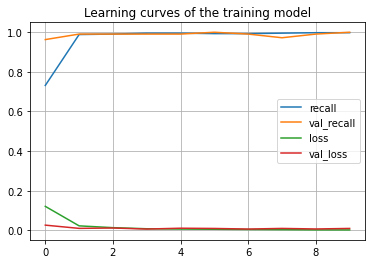

In [ ]:
training_metrics = pd.DataFrame(training_model.history)
plt.plot(training_metrics["recall"],label = "recall");
plt.plot(training_metrics["val_recall"], label = "val_recall");
plt.plot(training_metrics["loss"], label = "loss");
plt.plot(training_metrics["val_loss"], label = "val_loss");
plt.legend();
plt.grid(True)
plt.title("Learning curves of the training model");

Recall of the model increased over time while loss function decreased over time. Also, the model converged and the proximity of the learning curves indicates that there was no overfitting. 

In [ ]:
### F1 score of the training model
training_precision = np.mean(training_metrics.precision)
training_recall = np.mean(training_metrics.recall)
valid_precision = np.mean(training_metrics.val_precision)
valid_recall = np.mean(training_metrics.val_recall)
F1_score_training = 2 * (training_precision * training_recall) / (training_precision + training_recall)
F1_score_validation = 2 * (valid_precision * valid_recall) / (valid_precision + valid_recall)
print(f" the F1 score of the training model is {F1_score_training}")
print(f" the F1 score of the validation model is {F1_score_validation}")

 the F1 score of the training model is 0.968649169138605
 the F1 score of the validation model is 0.9830829218638457


In [ ]:
## Performance of model on the test dataset
random.seed(8989)
testing_model = model.fit(X_train_preprocessed, y_train, epochs=10, validation_data=(X_test_preprocessed, y_test))

Epoch 1/10
127/127 [==============================] - 0s 3ms/step - loss: 0.0014 - accuracy: 0.9998 - recall: 0.9977 - precision: 1.0000 - val_loss: 0.0118 - val_accuracy: 0.9968 - val_recall: 0.9926 - val_precision: 0.9781
Epoch 2/10
127/127 [==============================] - 0s 3ms/step - loss: 7.7031e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0175 - val_accuracy: 0.9937 - val_recall: 0.9926 - val_precision: 0.9504
Epoch 3/10
127/127 [==============================] - 0s 3ms/step - loss: 6.0206e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0162 - val_accuracy: 0.9960 - val_recall: 0.9926 - val_precision: 0.9710
Epoch 4/10
127/127 [==============================] - 0s 3ms/step - loss: 4.9891e-04 - accuracy: 1.0000 - recall: 1.0000 - precision: 1.0000 - val_loss: 0.0140 - val_accuracy: 0.9960 - val_recall: 0.9926 - val_precision: 0.9710
Epoch 5/10
127/127 [==============================] - 0s 3ms/step - loss: 3.9866e-04 - accur

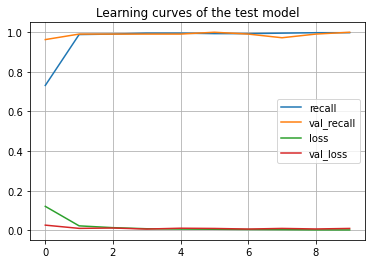

In [ ]:
test_metrics = pd.DataFrame(testing_model.history)
plt.plot(training_metrics["recall"],label = "recall");
plt.plot(training_metrics["val_recall"], label = "val_recall");
plt.plot(training_metrics["loss"], label = "loss");
plt.plot(training_metrics["val_loss"], label = "val_loss");
plt.legend();
plt.grid(True)
plt.title("Learning curves of the test model");

In [ ]:
### F1 score of the test model
training_precision = np.mean(test_metrics.precision)
training_recall = np.mean(test_metrics.recall)
test_precision = np.mean(test_metrics.val_precision)
test_recall = np.mean(test_metrics.val_recall)
F1_score_training = 2 * (training_precision * training_recall) / (training_precision + training_recall)
F1_score_test = 2 * (test_precision * test_recall) / (test_precision + test_recall)
print(f" the F1 score of the training dataset is {F1_score_training}")
print(f" the F1 score of the test dataset is {F1_score_test}")

 the F1 score of the training dataset is 0.9998842463034078
 the F1 score of the test dataset is 0.9828012127404617


Recall of the model in the test dataset increased over time while loss function decreased over time. Also, the model converged and the proximity of the learning curves indicates that there was no overfitting. 
The F1 score of the model is higher than the F1 score of the baseline/heuristic model which implies that the model is adding value in our classification task.

Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
clf = RandomForestClassifier(max_depth=40, random_state=0, n_estimators=100)
clf.fit(X_train_preprocessed, y_train)
y_pred=clf.predict(X_test_preprocessed)
print("Accuracy:",(accuracy_score(y_test, y_pred)*100))

Accuracy: 99.60474308300395


In [ ]:
confusion_matrix(y_test, y_pred)

array([[1126,    4],
       [   1,  134]])

In the test dataset, the random forest model had one misclassification as false negative and four misclassifications as false positive. 

In [ ]:
precision_RF =  134/(134+4)
recall_RF = 134/(134+1)
F1_RF = 2 * (precision_RF * recall_RF) / (precision_RF + recall_RF)
F1_RF

0.9816849816849818

The F1-score of the Random forest model is lower than the F1-score of the Neural network. However, both models perform better than the baseline/heuristic model. 